In [1]:
"""
Description: Build a machine learning model to predict whether a customer will churn based on behavioral and demographic data.
• Skills: Feature engineering, classification, model tuning.

https://www.youtube.com/watch?v=MSBY28IJ47U
"""

'\nDescription: Build a machine learning model to predict whether a customer will churn based on behavioral and demographic data.\n• Skills: Feature engineering, classification, model tuning.\n\nhttps://www.youtube.com/watch?v=MSBY28IJ47U\n'

# 1. Extract/Read Data

In [2]:
import os
os.listdir()

['.gitkeep',
 'Bank Customer churn',
 'CustomerChurn.ipynb',
 'Enc Task 3 - Churn prediction.ipynb',
 'Kaggle dataset link.txt',
 'Telco Customer Churn']

In [3]:
file_path=os.getcwd()+"\\Telco Customer Churn\\WA_Fn-UseC_-Telco-Customer-Churn.csv"
file_path

'c:\\Users\\KIIT\\Desktop\\GitHUB\\CODING-SAMURAI-INTERNSHIP-TASK\\Machine Learning- Dec15,2024 to Jan15,2025\\Project_5 -  Customer Churn Prediction\\Telco Customer Churn\\WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [4]:
import pandas as pd
data=pd.read_csv(file_path)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 2.EDA(Explanatory Data Analysis)

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 3. Data Handling

In [8]:
print(data.shape[0])
for i in data.columns:
    print(i," : ",len(data[i].unique()))
print()   
for i in data.columns:
    print(i," : ",data[i].unique())

7043
customerID  :  7043
gender  :  2
SeniorCitizen  :  2
Partner  :  2
Dependents  :  2
tenure  :  73
PhoneService  :  2
MultipleLines  :  3
InternetService  :  3
OnlineSecurity  :  3
OnlineBackup  :  3
DeviceProtection  :  3
TechSupport  :  3
StreamingTV  :  3
StreamingMovies  :  3
Contract  :  3
PaperlessBilling  :  2
PaymentMethod  :  4
MonthlyCharges  :  1585
TotalCharges  :  6531
Churn  :  2

customerID  :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes'

In [9]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
le=LabelEncoder()
#ct=ColumnTransformer()

data["gender"]=le.fit_transform(data["gender"])

data["SeniorCitizen"]=le.fit_transform(data["SeniorCitizen"])
data["Partner"]=le.fit_transform(data["Partner"])
data["Dependents"]=le.fit_transform(data["Dependents"])

#ct_1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),list(data.columns).index("tenure"))],remainder='passthrough')
#data.iloc[:,list(data.columns).index("tenure")]=np.array(ct_1.fit_transform(data))
#data["tenure"]

data["PhoneService"]=le.fit_transform(data["PhoneService"])
data["MultipleLines"]=le.fit_transform(data["MultipleLines"])
data["InternetService"]=le.fit_transform(data["InternetService"])
data["OnlineSecurity"]=le.fit_transform(data["OnlineSecurity"])
data["OnlineBackup"]=le.fit_transform(data["OnlineBackup"])
data["DeviceProtection"]=le.fit_transform(data["DeviceProtection"])
data["TechSupport"]=le.fit_transform(data["TechSupport"])
data["StreamingTV"]=le.fit_transform(data["StreamingTV"])
data["StreamingMovies"]=le.fit_transform(data["StreamingMovies"])
data["Contract"]=le.fit_transform(data["Contract"])
data["PaperlessBilling"]=le.fit_transform(data["PaperlessBilling"])
data["PaymentMethod"]=le.fit_transform(data["PaymentMethod"])

#ct_2=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),list(data.columns).index("MonthlyCharges"))],remainder='passthrough')
#data.iloc[:,list(data.columns).index("MonthlyCharges")]=np.array(ct_1.fit_transform(data))
#ct_3=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),list(data.columns).index("TotalCharges"))],remainder='passthrough')
#data.iloc[:,list(data.columns).index("TotalCharges")]=np.array(ct_1.fit_transform(data))

data["Churn"]=le.fit_transform(data["Churn"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [11]:
data["TotalCharges"].replace(" ",np.nan,inplace=True)
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
data["TotalCharges"].fillna(data["TotalCharges"].dropna().median(),inplace=True)
data["TotalCharges"]=data["TotalCharges"].astype(float)                             # pd.to_numeric(data["TotalCharges"])
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


# 4. Feature Extraction

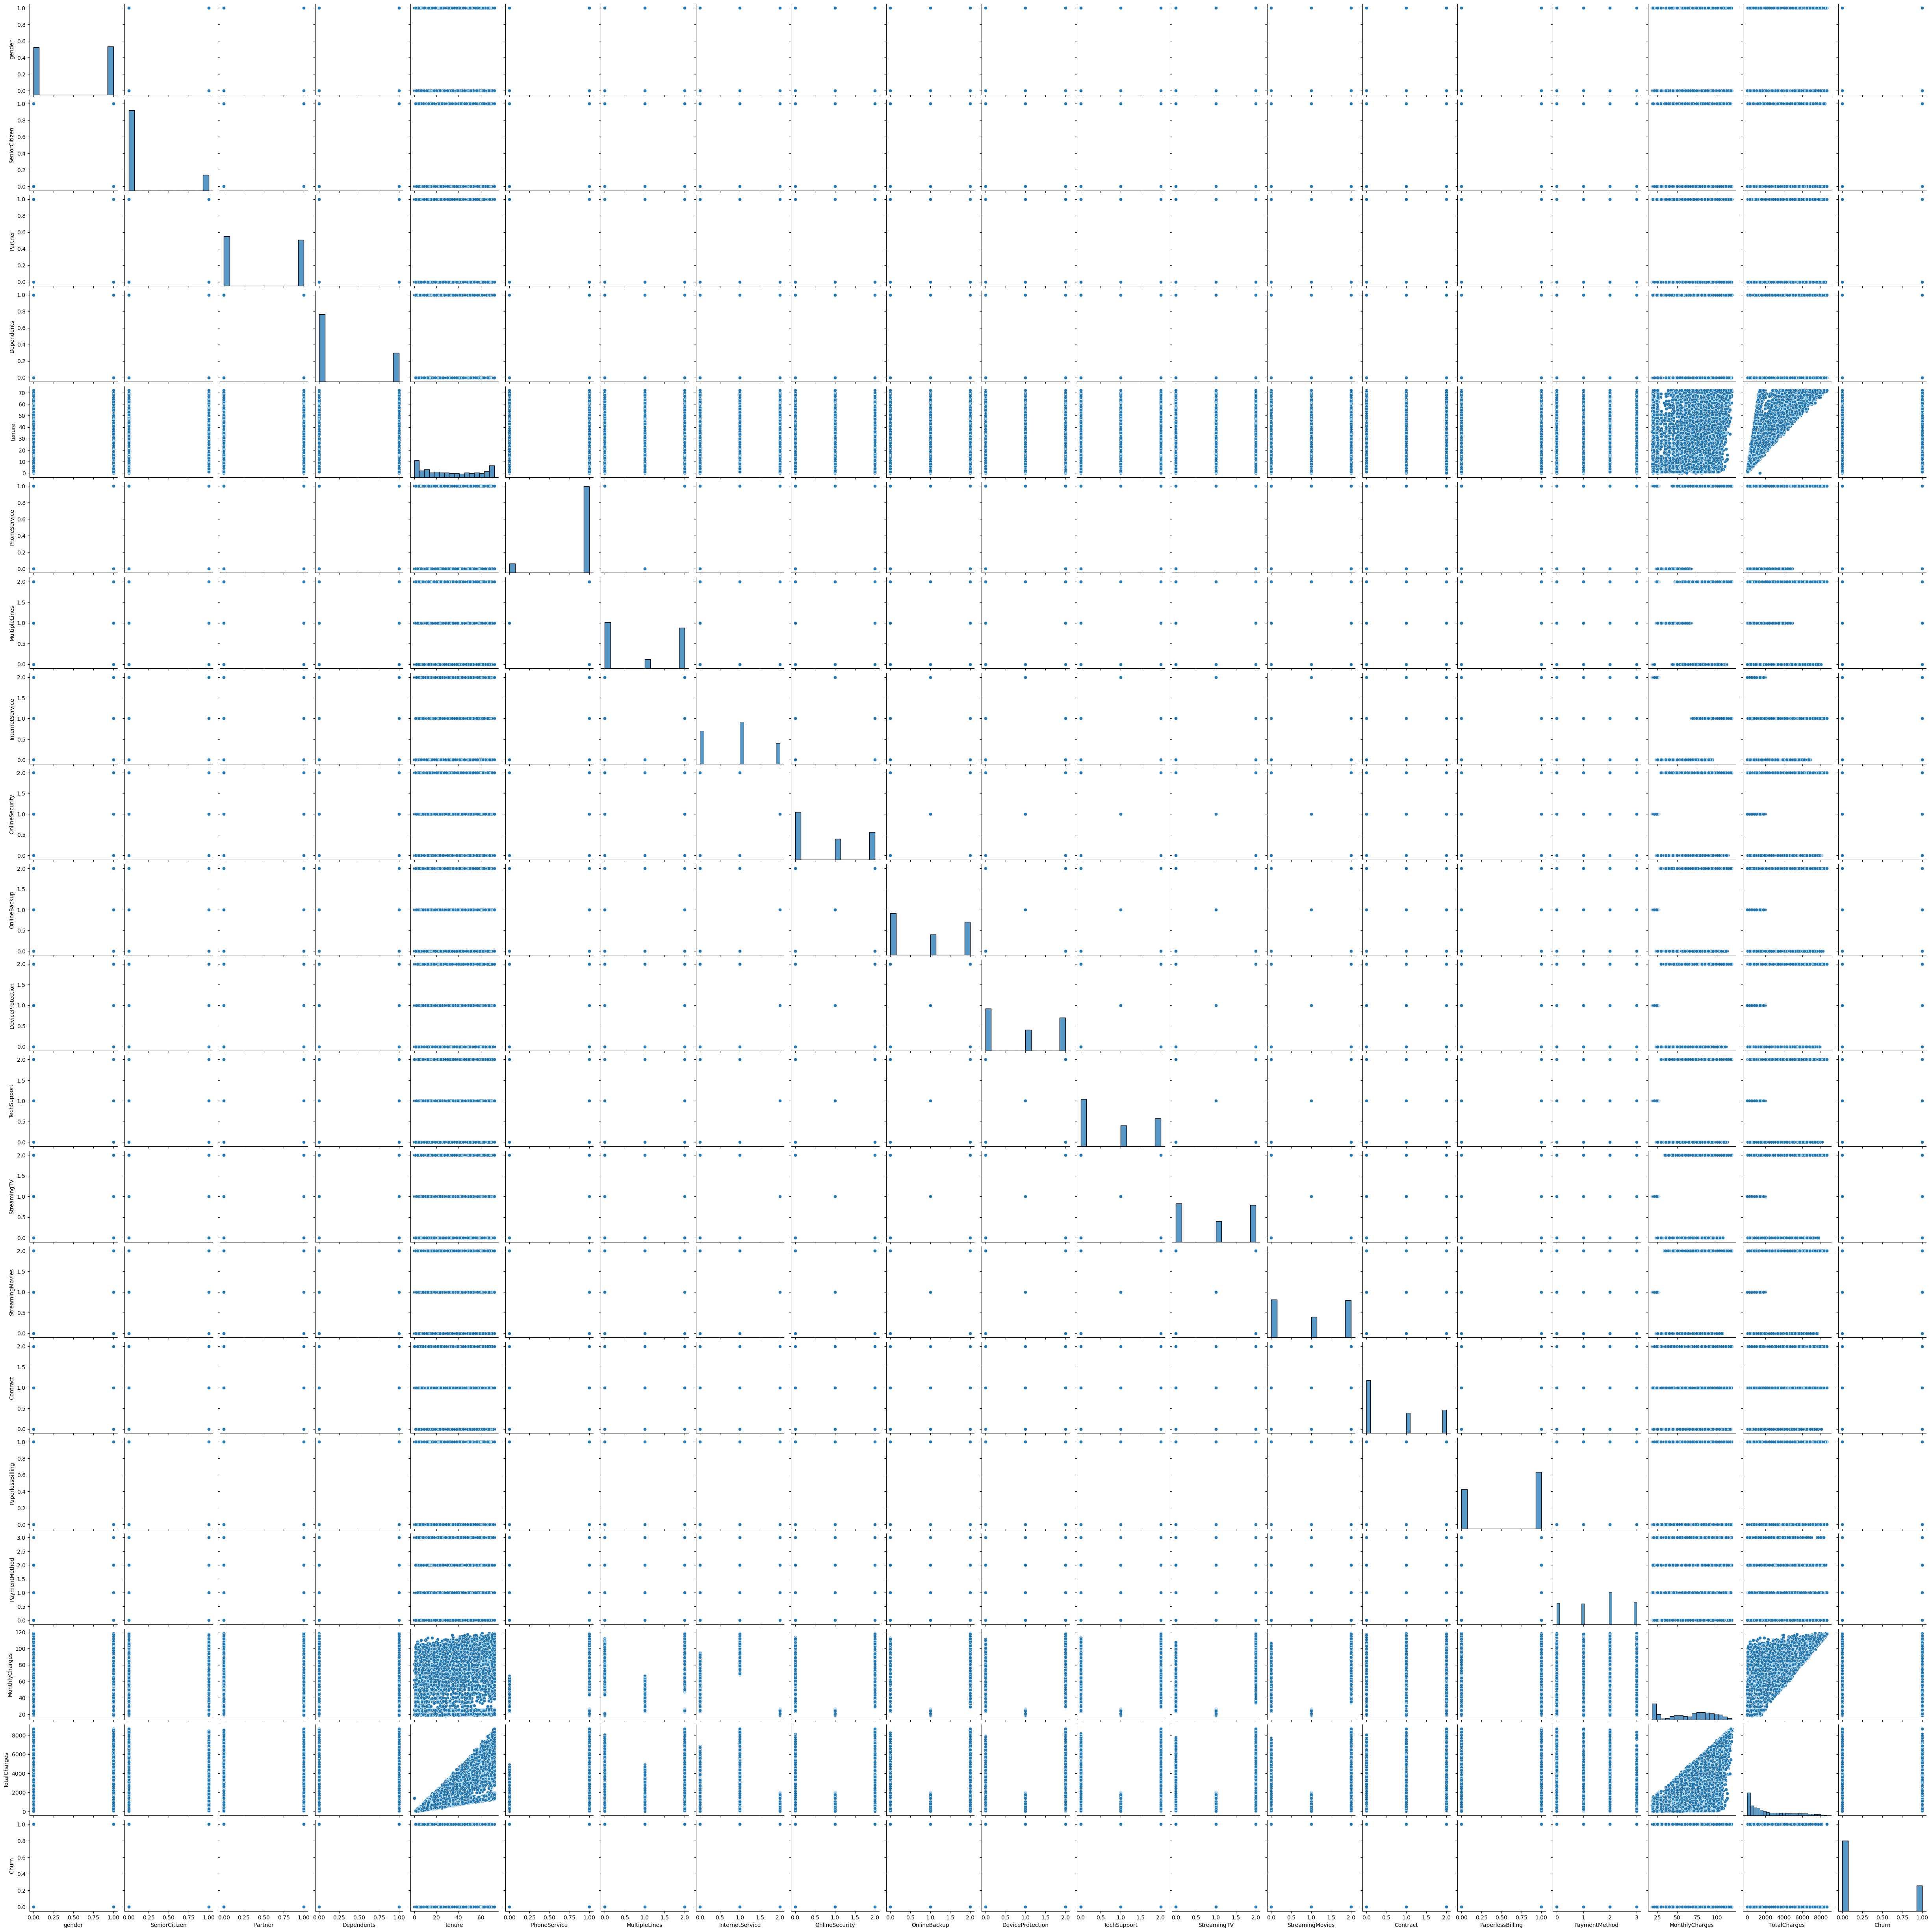

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()

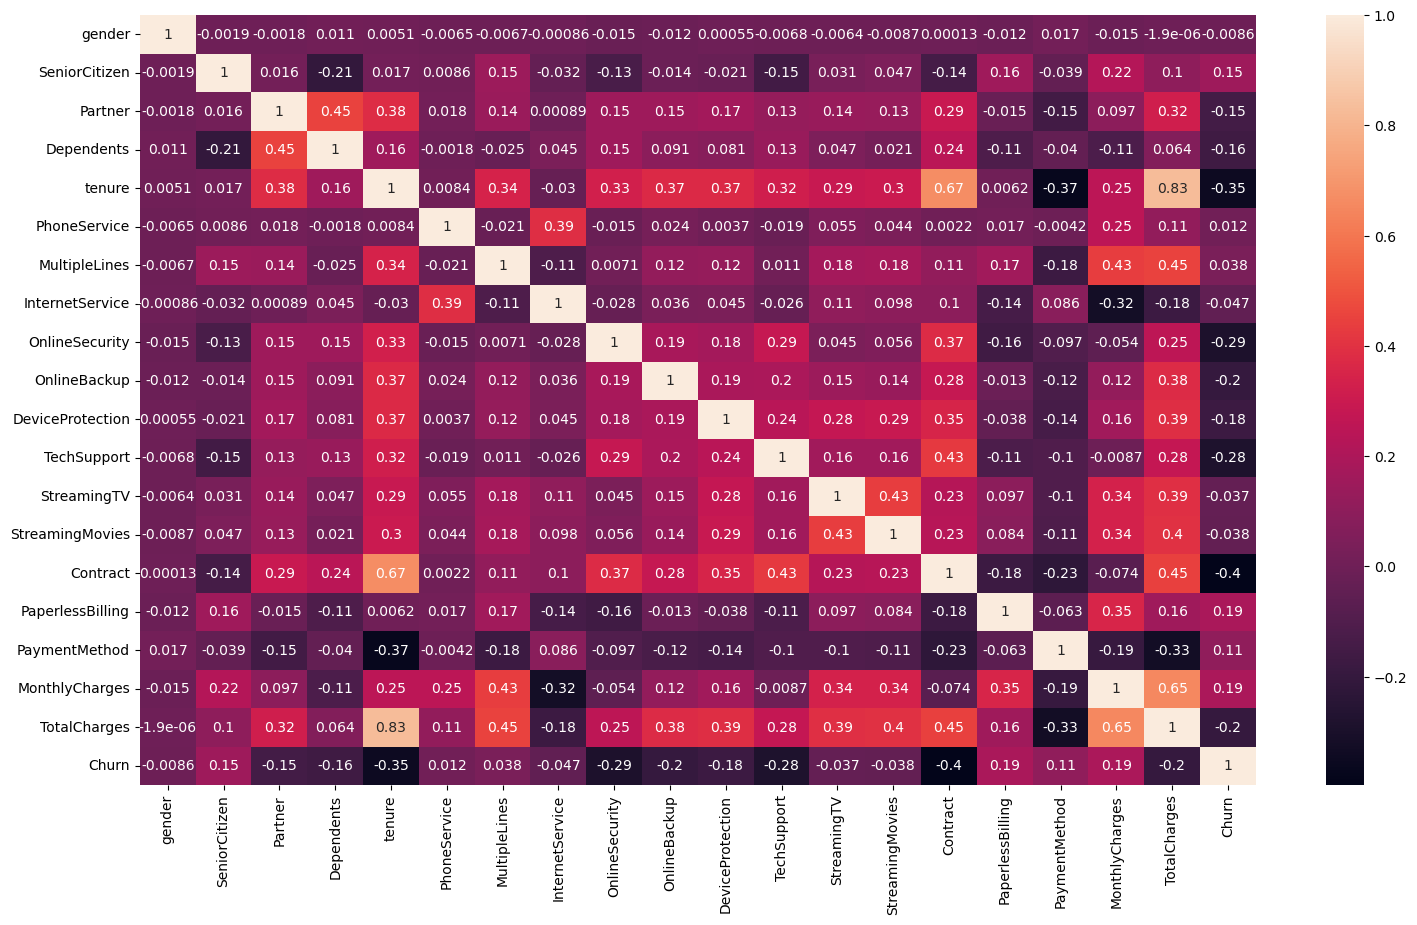

In [15]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=[18,10])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [16]:
x=data.iloc[:,1:-1]
y=data.iloc[:,-1].values

In [17]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [18]:
y

array([0, 0, 1, ..., 0, 1, 0])

# 4. Model Building - Logistic Regresssion

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
model_logR=LogisticRegression()
model_logR.fit(x_train,y_train)

LogisticRegression()

# 5. Model Evaluation - Logistic Regresion

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,f1_score,r2_score,accuracy_score,classification_report,confusion_matrix
import numpy as np
test_sc=model_logR.score(x_test,y_test)
train_sc=model_logR.score(x_train,y_train)
print("Training score : ",train_sc)
print("Testing score : ",test_sc)

Training score :  0.8004969826056088
Testing score :  0.8183108587650816


In [22]:
y_pred=model_logR.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [23]:
r2s=r2_score(y_test,y_pred)                 # To get r2score for RandomForestClassifier model 
mae=mean_absolute_error(y_test,y_pred)      # To get mean absolute error for RandomForestClassifier model
mse=mean_squared_error(y_test,y_pred)       # To get mean squared error for RandomForestClassifier model
rmse=np.sqrt(mse)                           # To get root mean squared error for RandomForestClassifier model
accsc=accuracy_score(y_test,y_pred)         # To get accuracy score values for RandomForestClassifier model
f1s=f1_score(y_test,y_pred)                 # To get f1_score values for RandomForestClassifier model
cm= confusion_matrix(y_test,y_pred)         # To get confusion matrix values for RandomForestClassifier model
cl_report=classification_report(y_test,y_pred)
print("R2 score : ",r2s)                    # To display R2 score 
print("Mean absolute error : ",mae)         # To display mean absolute error
print("Mean Squared error : ",mse)          # To display mean squared error
print("Root Mean Squared error : ",rmse)    # To display root mean squared error
print("Accuracy score : ",accsc)            # To display accuracy score
print("F1 Score : ",f1s)                    # To display f1 score
print("Confusion Matrix : \n",cm)           # To display confusion matrix
print("\nClassification Report : \n",cl_report)

R2 score :  0.06656867514776377
Mean absolute error :  0.1816891412349184
Mean Squared error :  0.1816891412349184
Root Mean Squared error :  0.42625009235766553
Accuracy score :  0.8183108587650816
F1 Score :  0.6289855072463769
Confusion Matrix : 
 [[936 100]
 [156 217]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



# 6. Model Building - SVM

In [24]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear')  # For linear decision boundary
model_svc.fit(x_train, y_train)

SVC(kernel='linear')

# 7. Model Evaluation - SVM

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,f1_score,r2_score,accuracy_score,classification_report,confusion_matrix
import numpy as np
test_sc=model_svc.score(x_test,y_test)
train_sc=model_svc.score(x_train,y_train)
print("Training score : ",train_sc)
print("Testing score : ",test_sc)

Training score :  0.7960596379126731
Testing score :  0.7934705464868701


In [26]:
y_pred=model_svc.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [27]:
r2s=r2_score(y_test,y_pred)                 # To get r2score for RandomForestClassifier model 
mae=mean_absolute_error(y_test,y_pred)      # To get mean absolute error for RandomForestClassifier model
mse=mean_squared_error(y_test,y_pred)       # To get mean squared error for RandomForestClassifier model
rmse=np.sqrt(mse)                           # To get root mean squared error for RandomForestClassifier model
accsc=accuracy_score(y_test,y_pred)         # To get accuracy score values for RandomForestClassifier model
f1s=f1_score(y_test,y_pred)                 # To get f1_score values for RandomForestClassifier model
cm= confusion_matrix(y_test,y_pred)         # To get confusion matrix values for RandomForestClassifier model
cl_report=classification_report(y_test,y_pred)
print("R2 score : ",r2s)                    # To display R2 score 
print("Mean absolute error : ",mae)         # To display mean absolute error
print("Mean Squared error : ",mse)          # To display mean squared error
print("Root Mean Squared error : ",rmse)    # To display root mean squared error
print("Accuracy score : ",accsc)            # To display accuracy score
print("F1 Score : ",f1s)                    # To display f1 score
print("Confusion Matrix : \n",cm)           # To display confusion matrix
print("\nClassification Report : \n",cl_report)

R2 score :  -0.061048888796877865
Mean absolute error :  0.20652945351312987
Mean Squared error :  0.20652945351312987
Root Mean Squared error :  0.45445511716024267
Accuracy score :  0.7934705464868701
F1 Score :  0.5373608903020668
Confusion Matrix : 
 [[949  87]
 [204 169]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.45      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



# 8. Model Building - Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier()

# 9. Model Evaluation - Decision Tree

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,f1_score,r2_score,accuracy_score,classification_report,confusion_matrix
import numpy as np
test_sc=model_dtc.score(x_test,y_test)
train_sc=model_dtc.score(x_train,y_train)
print("Training score : ",train_sc)
print("Testing score : ",test_sc)

Training score :  0.9985800496982605
Testing score :  0.7331440738112136


In [30]:
y_pred=model_dtc.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [31]:
r2s=r2_score(y_test,y_pred)                 # To get r2score for RandomForestClassifier model 
mae=mean_absolute_error(y_test,y_pred)      # To get mean absolute error for RandomForestClassifier model
mse=mean_squared_error(y_test,y_pred)       # To get mean squared error for RandomForestClassifier model
rmse=np.sqrt(mse)                           # To get root mean squared error for RandomForestClassifier model
accsc=accuracy_score(y_test,y_pred)         # To get accuracy score values for RandomForestClassifier model
f1s=f1_score(y_test,y_pred)                 # To get f1_score values for RandomForestClassifier model
cm= confusion_matrix(y_test,y_pred)         # To get confusion matrix values for RandomForestClassifier model
cl_report=classification_report(y_test,y_pred)
print("R2 score : ",r2s)                    # To display R2 score 
print("Mean absolute error : ",mae)         # To display mean absolute error
print("Mean Squared error : ",mse)          # To display mean squared error
print("Root Mean Squared error : ",rmse)    # To display root mean squared error
print("Accuracy score : ",accsc)            # To display accuracy score
print("F1 Score : ",f1s)                    # To display f1 score
print("Confusion Matrix : \n",cm)           # To display confusion matrix
print("\nClassification Report : \n",cl_report)

R2 score :  -0.3709772583767219
Mean absolute error :  0.2668559261887864
Mean Squared error :  0.2668559261887864
Root Mean Squared error :  0.5165809967360263
Accuracy score :  0.7331440738112136
F1 Score :  0.503957783641161
Confusion Matrix : 
 [[842 194]
 [182 191]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1036
           1       0.50      0.51      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.73      0.73      1409



# 10. Model Building - Random Forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(x_train, y_train)

RandomForestClassifier()

# 11. Model Evaluation - Random Forest 

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,f1_score,r2_score,accuracy_score,classification_report,confusion_matrix
import numpy as np
test_sc=model_rfc.score(x_test,y_test)
train_sc=model_rfc.score(x_train,y_train)
print("Training score : ",train_sc)
print("Testing score : ",test_sc)

Training score :  0.9984025559105432
Testing score :  0.7934705464868701


In [34]:
y_pred=model_rfc.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [35]:
r2s=r2_score(y_test,y_pred)                 # To get r2score for RandomForestClassifier model 
mae=mean_absolute_error(y_test,y_pred)      # To get mean absolute error for RandomForestClassifier model
mse=mean_squared_error(y_test,y_pred)       # To get mean squared error for RandomForestClassifier model
rmse=np.sqrt(mse)                           # To get root mean squared error for RandomForestClassifier model
accsc=accuracy_score(y_test,y_pred)         # To get accuracy score values for RandomForestClassifier model
f1s=f1_score(y_test,y_pred)                 # To get f1_score values for RandomForestClassifier model
cm= confusion_matrix(y_test,y_pred)         # To get confusion matrix values for RandomForestClassifier model
cl_report=classification_report(y_test,y_pred)
print("R2 score : ",r2s)                    # To display R2 score 
print("Mean absolute error : ",mae)         # To display mean absolute error
print("Mean Squared error : ",mse)          # To display mean squared error
print("Root Mean Squared error : ",rmse)    # To display root mean squared error
print("Accuracy score : ",accsc)            # To display accuracy score
print("F1 Score : ",f1s)                    # To display f1 score
print("Confusion Matrix : \n",cm)           # To display confusion matrix
print("\nClassification Report : \n",cl_report)

R2 score :  -0.061048888796877865
Mean absolute error :  0.20652945351312987
Mean Squared error :  0.20652945351312987
Root Mean Squared error :  0.45445511716024267
Accuracy score :  0.7934705464868701
F1 Score :  0.547433903576983
Confusion Matrix : 
 [[942  94]
 [197 176]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# 12. Model Building - ANN

In [36]:
from sklearn.neural_network import MLPClassifier
model_ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
model_ann.fit(x_train, y_train)

MLPClassifier(max_iter=500)

# 13. Model Evaluation - ANN

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,f1_score,r2_score,accuracy_score,classification_report,confusion_matrix
import numpy as np
test_sc=model_ann.score(x_test,y_test)
train_sc=model_ann.score(x_train,y_train)
print("Training score : ",train_sc)
print("Testing score : ",test_sc)

Training score :  0.791089811856585
Testing score :  0.8034066713981547


In [38]:
y_pred=model_ann.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [39]:
r2s=r2_score(y_test,y_pred)                 # To get r2score for RandomForestClassifier model 
mae=mean_absolute_error(y_test,y_pred)      # To get mean absolute error for RandomForestClassifier model
mse=mean_squared_error(y_test,y_pred)       # To get mean squared error for RandomForestClassifier model
rmse=np.sqrt(mse)                           # To get root mean squared error for RandomForestClassifier model
accsc=accuracy_score(y_test,y_pred)         # To get accuracy score values for RandomForestClassifier model
f1s=f1_score(y_test,y_pred)                 # To get f1_score values for RandomForestClassifier model
cm= confusion_matrix(y_test,y_pred)         # To get confusion matrix values for RandomForestClassifier model
cl_report=classification_report(y_test,y_pred)
print("R2 score : ",r2s)                    # To display R2 score 
print("Mean absolute error : ",mae)         # To display mean absolute error
print("Mean Squared error : ",mse)          # To display mean squared error
print("Root Mean Squared error : ",rmse)    # To display root mean squared error
print("Accuracy score : ",accsc)            # To display accuracy score
print("F1 Score : ",f1s)                    # To display f1 score
print("Confusion Matrix : \n",cm)           # To display confusion matrix
print("\nClassification Report : \n",cl_report)

R2 score :  -0.0100018632190213
Mean absolute error :  0.19659332860184528
Mean Squared error :  0.19659332860184528
Root Mean Squared error :  0.44338846241399343
Accuracy score :  0.8034066713981547
F1 Score :  0.6311584553928096
Confusion Matrix : 
 [[895 141]
 [136 237]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1036
           1       0.63      0.64      0.63       373

    accuracy                           0.80      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.80      0.80      0.80      1409



# 14. Model Testing: Logistic, SVM, Decision Tree, Random Forest, ANN

In [40]:
from sklearn.metrics import accuracy_score                      # Importing accuracy score from metrics in Sklearn
def test_single_instance(models, x_test, y_test, index=0):      # Function that takes model details, testing data sets and index values for testing

    actual_value = y_test[index]                                # Get the actual output value for the selected instance
    data_values= x_test.iloc[index]                             # Get the data value for the selected instance
    print(f"Actual churn for the instance {index}:", actual_value, "\nData Value : \n",data_values,'\n\n')      # Display data for the selected instance
    for model_name, model in models.items():                                    # To get model details
        print(f"Model testing for {model_name}")                                # Dsplay model name
        y_pred_single = model.predict(x_test.iloc[[index]])                     # To Predict data for the selected single instance
        print(f"\tPredicted churn for instance {index}:", y_pred_single[0])     # Display the data for the selected single instance
        accuracy = accuracy_score([actual_value], y_pred_single)                # Calculate accuracy (for a selected single instance, accuracy is either 0 or 1)
        print(f"\tAccuracy prediction churn for instance {index}:", accuracy)             # Display the accuracy for a selected single instance 
        print("*"*60)

# Create a dictionary of models
models = {
    'Logistic Regression': model_logR,
    'Support Vector Machine':model_svc,
    'Random Forest': model_rfc,
    'Decision Tree': model_dtc,
    'ANN':model_ann
}
test_single_instance(models, x_test, y_test, index=3)   # Call the function for the first instance in the test set


Actual churn for the instance 3: 1 
Data Value : 
 gender               0.00
SeniorCitizen        0.00
Partner              0.00
Dependents           0.00
tenure               1.00
PhoneService         1.00
MultipleLines        0.00
InternetService      1.00
OnlineSecurity       0.00
OnlineBackup         0.00
DeviceProtection     2.00
TechSupport          0.00
StreamingTV          0.00
StreamingMovies      0.00
Contract             0.00
PaperlessBilling     0.00
PaymentMethod        2.00
MonthlyCharges      76.35
TotalCharges        76.35
Name: 1807, dtype: float64 


Model testing for Logistic Regression
	Predicted churn for instance 3: 1
	Accuracy prediction churn for instance 3: 1.0
************************************************************
Model testing for Support Vector Machine
	Predicted churn for instance 3: 1
	Accuracy prediction churn for instance 3: 1.0
************************************************************
Model testing for Random Forest
	Predicted churn for instanc